In [1]:
import sys
sys.path.append('/Users/daiyiluo/Documents/ELEC599')
import CalHMM
import numpy as np
import matplotlib.pyplot as plt
import hmmlearn.hmm
import warnings
warnings.filterwarnings('ignore')
import imp

In [ ]:
imp.reload(CalHMM)

## a. Load data

In [2]:
folder = '/Users/daiyiluo/Downloads/caiman_t/dan_CA1' #'/Users/daiyiluo/Downloads/KQ095_210205' #KQ086_210110' #
timebin = 500

In [3]:
data = np.load(f'{folder}/timebin_{timebin}.npz') #{folder}/timebin_500.npz
Distance = data['Distance']
lap_end = [] #data['lap_end']
idx = data['idx']
del data

Spike = np.load(f'{folder}/timebin_{timebin}_spks.npy')

Spike.shape, Distance.shape #, idx.shape # Spike should be of shape (#sample, #neuron)

((738, 545), (738,))

In [ ]:
plt.plot(Spike[:,30])

## b. Run Poisson HMM
### Original data

In [4]:
origin = hmmlearn.hmm.PoissonHMM(n_components=20) 
origin.fit(Spike)

x1, plst1, occ1, posterior_states1, pos_COM1 = CalHMM.comp_poststates_pos(origin, Spike, Distance, sort='maximum')
err_rate1, dev1, Decoded_position1 = CalHMM.comp_decoded_pos_acc(Distance, posterior_states1, pos_COM1, mode = 'linear')

print(f'Error Rate: {err_rate1}')

213.13061305930992
Error Rate: 0.4193109225838634


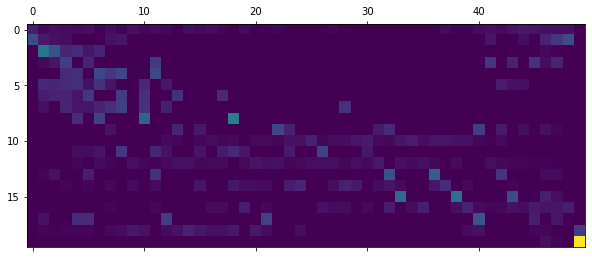

In [7]:
plt.matshow(x1)

In [14]:
plt.figure()
plt.plot(x1[1,:])

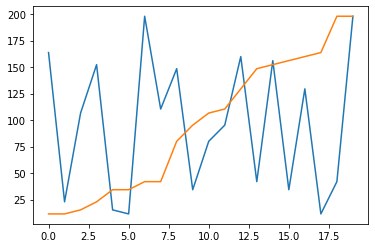

In [5]:
plt.plot(pos_COM1)
plt.plot(pos_COM1[plst1])

In [9]:
%matplotlib

Using matplotlib backend: MacOSX


In [10]:
plt.plot(Distance)
plt.plot(Decoded_position1)
plt.plot()

In [ ]:
plt.matshow(x1)
for i,pos in enumerate(pos_COM):
    plt.plot(np.where(d==pos)[0],i,'*')

In [ ]:
pos_COM = np.max(x1,axis=1)
pos_COM.shape

In [ ]:
d = np.unique(Distance)

In [ ]:
x, plst, occ, posterior_states, pos_COM = CalHMM.comp_poststates_pos(origin, Spike, Distance, sort='maximum')
posterior_states.shape

In [ ]:
%matplotlib

In [15]:
plt.matshow(-posterior_states1[:,plst1].T, cmap = 'gray')
plt.plot(Distance/Distance.max()*20, label='position')

In [ ]:
_, _, _, _, _, _ = CalHMM.show_all_plots(origin, Spike, Distance, lap_end, t_st=100, t_duration=600,vmax=.2)

### Time Shuffle

In [ ]:
ts_Spike = CalHMM.get_time_shuffle(Spike)
ts = hmmlearn.hmm.PoissonHMM(n_components=20) 
ts.fit(ts_Spike)

x2, plst2, occ2, posterior_states2, pos_COM2 = CalHMM.comp_poststates_pos(ts, Spike, Distance)
err_rate2, dev2, Decoded_position2 = CalHMM.comp_decoded_pos_acc(Distance, posterior_states2, pos_COM2)

print(f'Error Rate: {err_rate2}')

In [ ]:
_, _, _, _, _, _ = CalHMM.show_all_plots(ts, Spike, Distance, lap_end, t_st=200, t_duration=300,vmax=.2)

## c. Save and Reolad

In [ ]:
save = False
if save==True:
    CalHMM.save_object(origin, f'{folder}/timebin_{timebin}_spk_origin.pkl')
    CalHMM.save_object(ts, f'{folder}/timebin_{timebin}_spk_ts.pkl')
    CalHMM.save_object(trsn, f'{folder}/timebin_{timebin}_spk_trsn.pkl')

In [ ]:
origin = CalHMM.load_object(f'{folder}/timebin_{timebin}_spk_origin.pkl')
ts = CalHMM.load_object(f'{folder}/timebin_{timebin}_spk_ts.pkl')
trsn = CalHMM.load_object(f'{folder}/timebin_{timebin}_spk_trsn.pkl')

## Check coactivation in states

In [ ]:
origin.means_.shape

In [ ]:
%matplotlib

In [ ]:
plt.matshow(origin.means_)

In [ ]:
plt.colorbar()